# DATA CLEANING


In [23]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller


# Read the Excel file
df = pd.read_excel('GovtBonds+FPIs.xlsx')

# Create a DataFrame with Date, YLD_YTM_MID, and Total columns
yield_total_df = df[['Date', 'YLD_YTM_MID', 'Total']].copy()

# Display the new DataFrame
print(yield_total_df)



          Date  YLD_YTM_MID  Total
0   2011-01-31        8.545   5366
1   2011-02-28        8.517  -3268
2   2011-03-31        8.349   6880
3   2011-04-29        8.475   7195
4   2011-05-31        8.668  -4275
..         ...          ...    ...
130 2024-05-31        7.224 -12911
131 2024-06-28        7.035  41757
132 2024-07-31        6.997  48796
133 2024-08-30        6.940  25493
134        NaT        6.853  93538

[135 rows x 3 columns]


In [ ]:
yield_total_df['Yld_Returns'] = np.log(yield_total_df['YLD_YTM_MID'] / yield_total_df['YLD_YTM_MID'].shift(1))
yield_total_df['Total_Returns'] = np.log(yield_total_df['Total'] / yield_total_df['Total'].shift(1))

# Drop rows with NaN values resulting from the shift operation
log_returns_df = yield_total_df[['Date', 'Yld_Returns','Total_Returns']].dropna()

# Display the DataFrame with log returns
print(log_returns_df)

          Date  Log_Returns
1   2011-02-28    -0.003282
2   2011-03-31    -0.019922
3   2011-04-29     0.014979
4   2011-05-31     0.022517
5   2011-06-30    -0.014526
..         ...          ...
129 2024-04-30     0.017672
130 2024-05-31    -0.003593
131 2024-06-28    -0.026511
132 2024-07-31    -0.005416
133 2024-08-30    -0.008180

[133 rows x 2 columns]


In [ ]:
result = adfuller(yield_total_df['Log_Returns'])

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Check if the series is stationary
if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

ADF Statistic: -10.29374375386606
p-value: 3.5149547959372035e-18
Critical Values:
   1%: -3.481281802271349
   5%: -2.883867891664528
   10%: -2.5786771965503177
The series is stationary.


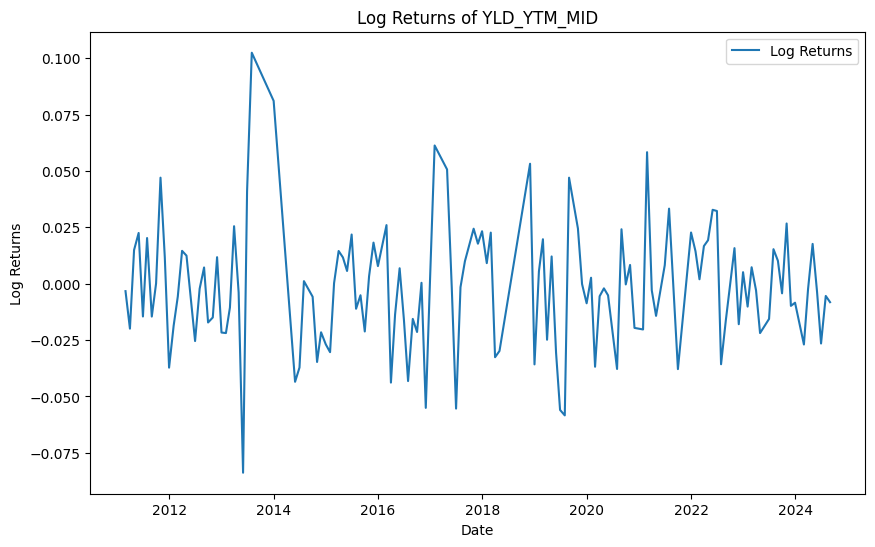

In [28]:


# Plot the log returns series
plt.figure(figsize=(10, 6))
plt.plot(log_returns_df['Date'], log_returns_df['Log_Returns'], label='Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.title('Log Returns of YLD_YTM_MID')
plt.legend()
plt.show()